<a href="https://colab.research.google.com/github/akshayanant/kmeans/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

#Class for Implementing the KMeans Algorithm
class KMeans():
  
  #Constructor
  def __init__(self,data):
    self.x = np.array(data['AllSamples'])
  
  #Function for implementing strategy 1
  def kmeansRandom(self):
    obj_fn = {}
    for k in range(2,11):    
      centers = self.initialize_centers(k=k,all_random=True)
      centers = self.kmeans(centers,k)
      obj_fn[k] = self.calc_obj_val(centers,k)
    self.plot_results(centers,obj_fn)
    
  #Function for implementing strategy 2
  def kmeansMaxDistance(self):
    obj_fn = {}
    for k in range(2,11):    
      centers = self.initialize_centers(k=k,all_random=False)
      centers = self.kmeans(centers,k)
      obj_fn[k] = self.calc_obj_val(centers,k)
      #self.plot_results(centers)
    self.plot_results(centers,obj_fn)

  #Function to update the pre initialized centers iteratively until centroids converge 
  def kmeans(self,centers,k):
      prevCentres = np.zeros((k,2),dtype=float)
      while(not self.converge(centers,prevCentres)):
        count = np.zeros((k,),dtype=float)
        xSum = np.zeros((k,),dtype=float)
        ySum = np.zeros((k,),dtype=float)
        for sample in self.x:
          minDist = self.distance(sample,centers[0])
          cluster=0
          index = 1
          while(index<k):
            dist = self.distance(sample,centers[index])
            if(dist<minDist):
              minDist = dist
              cluster = index
            index+=1
          count[cluster]+=1
          xSum[cluster]+=sample[0]
          ySum[cluster]+=sample[1]
        prevCentres = np.array(centers,copy=True)
        for i in range(k):
          centers[i] = np.array([xSum[i]/count[i],ySum[i]/count[i]])
      return centers

  #Function to initialize centers based on different strategies
  def initialize_centers(self,k=2,all_random=True):
    centers = np.zeros((k,2),dtype=float)
    #for strategy 1 where all centers are randomly selected
    if(all_random):
      for index in range(k):
        centers[index] = self.x[np.random.choice(x.shape[0],size=1,replace=False)]
      return centers
    #For strategy 2, where centers are selected such that their avg distance is
    #maximum from the previous choosen centers
    index = np.random.choice(self.x.shape[0],size=1,replace=False)
    centers[0] = self.x[index]
    taken = np.zeros((self.x.shape[0],),dtype=int)
    taken[index] = 1
    selected = [centers[0]]
    for i in range(1,k):
      maxDistance = 0
      maxindex = 0
      for sample_index in range(self.x.shape[0]):
        if(taken[sample_index]==1):
          continue
        for select in selected:
          maxDistance += self.distance(select,self.x[sample_index])
        maxIndex = sample_index
        break
      cur_index = maxIndex+1
      while(cur_index<self.x.shape[0]):
        if(taken[cur_index]):
          cur_index+=1
          continue
        dist = 0
        for select in selected:
          dist+=self.distance(select,self.x[cur_index])
        if(dist>maxDistance):
          maxDistance = dist
          maxIndex = cur_index
        cur_index+=1
      selected.append(self.x[maxIndex])
      taken[maxIndex] = 1
      centers[i] = self.x[maxIndex]
    return centers

  #Function to calculate objective value for the given centers and k 
  def calc_obj_val(self,centers,k):
    obj_val = 0.0
    for sample in self.x:
          minDist = distance(sample,centers[0])
          cluster=0
          index = 1
          while(index<k):
            dist = distance(sample,centers[index])
            if(dist<minDist):
              minDist = dist
              cluster = index
            index+=1
          obj_val+=distance(sample,centers[cluster])
    return obj_val
  
  #Function to check whether the centeroids are changing(not converged) or not(converged)
  def converge(self,centers,prevcenters):
    for i in range(centers.shape[0]):
      if(abs(centers[i][0]-prevcenters[i][0])>0.0) or (abs(centers[i][1]-prevcenters[i][1])>0.0):
        return False
    return True
  
  #Helper Function to calculate the distance between two points
  def distance(self,center,point):
    return ((center[0]-point[0])**2+(center[1]-point[1])**2)**(1/2.0)
  
  #Helper Function for plotting the results
  def plot_results(self,centers,obj_fn=None):
      #plot data items as * and highlight the centers as +
      plt.plot(self.x[:,0],x[:,1],'.')
      plt.plot(centers[:,0],centers[:,1],'+')
      plt.xlabel('X1')
      plt.ylabel('X2')
      plt.show()
      if(obj_fn!=None):
        #Plot Objective function as a function of k
        plt.plot(list(obj_fn.keys()),list(obj_fn.values()))
        plt.xlabel('K')
        plt.ylabel('Objective Function')
        plt.show()

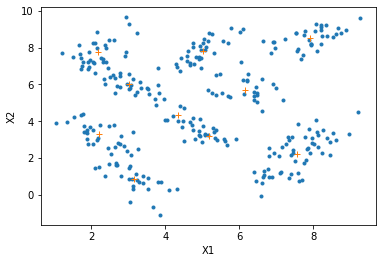

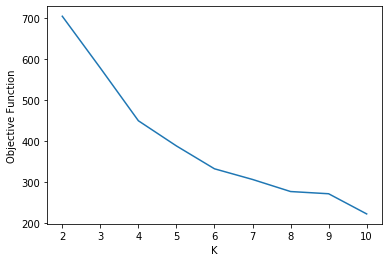

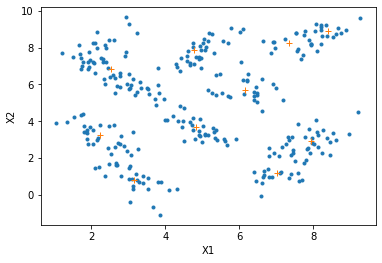

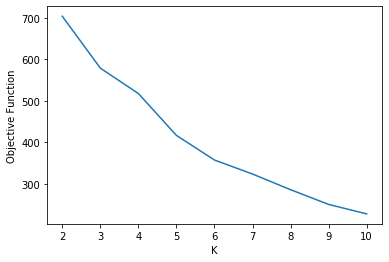

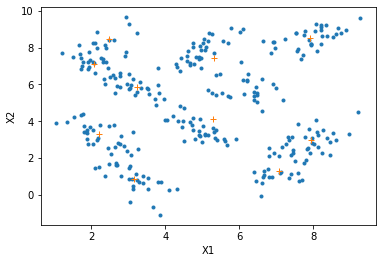

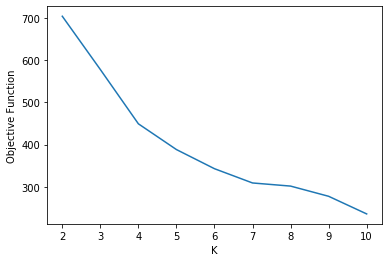

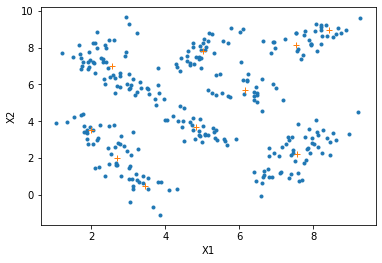

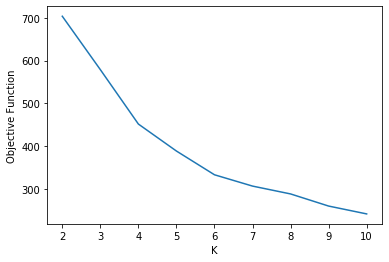

In [53]:
def main():
  data = loadmat('AllSamples.mat') #Loading Data
  kmeansmodel = KMeans(data)       #Instantiation
  
  #Initialization 1
  np.random.seed(0)
  kmeansmodel.kmeansRandom()       #Strategy 1
  kmeansmodel.kmeansMaxDistance()  #Strategy 2
  
  #Initialization 2
  np.random.seed(1)
  kmeansmodel.kmeansRandom()       #Strategy 1
  kmeansmodel.kmeansMaxDistance()  #Strategy 2
if(__name__ == '__main__'):
  main()